#i. Perkenalan

'''
=================================================
Graded Challenge 4

Nama  : Desvin Sitohang
Batch : MSIB-06 (RMT-029)

Ini adalah Machine Learning yang dirancang untuk untuk memprediksi harga taksi online dari variabel fiturnya menggunakan regresi linier.
=================================================
'''

#ii. Import Libraries

In [7]:
#Loading Dataset
!pip install kaggle

#Menganalisis data
import pandas as pd

#Melakukan pengolahan angka
import numpy as np

#Membuat visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
!pip install squarify
import squarify

#Feature Selection
from scipy.stats import kendalltau
from scipy.stats import spearmanr

#preposesing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler

#Penanganan Outlier
!pip install feature-engine
from feature_engine.outliers import OutlierTrimmer

#pemodelan ml
from sklearn.linear_model import LinearRegression

#evalusai model
from sklearn.metrics import mean_absolute_error, r2_score

#save model
import pickle
import joblib
import json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.6 MB/s eta 0:00:00


#iii. Data Loading

Data akan saya load mengunakan API Command dari website kaggle langsung

In [9]:
!mkdir ~/.kaggle #Membuat directory baru untuk data kaggle nanti

In [11]:
!cp /content/kaggle.json ~/.kaggle #Menload token kaggle

In [12]:
!chmod 600 /root/.kaggle/kaggle.json #digunakan untuk mengatur hak akses (permissions) untuk sebuah file

In [13]:
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma #Menload data langsung dari website kaggle

 72% 32.0M/44.5M [00:00<00:00, 80.5MB/s]
100% 44.5M/44.5M [00:00<00:00, 104MB/s] 


In [18]:
!unzip -q /content/uber-and-lyft-dataset-boston-ma.zip #Membuka data kompres

replace rideshare_kaggle.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [17]:
datauber=pd.read_csv('rideshare_kaggle.csv') #Membaca data dan mendeskripkan ke variabel datauber

membuat salinan dari data asli

In [19]:
df=datauber

#iv. Exploratory Data Analysis (EDA)

Hal pertama yang dilakukan pada eksplorasi data, akan dilhat terlebih dahulu anomali data, bentuk data, dan ringkasan data nya.

### Pertama akan dilihat apakah ada data duplikat atau tidak

In [20]:
df.duplicated().sum()

0

### Setelah dilakukan analisa, tidak ada data duplikat yang terditeksi. maka tidak terdapat duplikasi data

### Kemudian akan dilihat missing value dari data

In [21]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

### Setelah dilakukan analisa, nampak bahwa terdapat 55.905 missing value pada kolom price. karena terdapat missing value pada kolom target, maka akan dilakukan pengecekan kembali untuk mengetahui penanganan yang akan dilakukan.

In [22]:
df[df['price'].isnull()]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,...,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,...,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693025,70ad9983-92dd-4cdf-af16-732e7e9ee9d0,1.544887e+09,15,15,12,2018-12-15 15:15:13,America/New_York,South Station,Beacon Hill,Uber,...,0.0081,1544893200,39.68,1544929200,54.46,1544896800,36.43,1544929200,53.79,1544896800
693047,84e05ef0-781a-4bd5-a593-bbbf659d4ba0,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693049,885ef635-299e-45cf-8052-c45a39e9822a,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,North End,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693060,50a7b6be-ed2a-4a11-8d36-73bd977ad66a,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000


### Setelah dicheck, karena data fitur hampir memiliki nilai yang sama pada missing value pada kolom target(price) maka akan dilakukan amputasi data.

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

### Setelah diamputasi, maka nampak tidak ada lagi missing value pada data

### Melihat bentuk data serta tipe data setiap kolom

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari output diatas, dapat diketahui bahwa dataset uber memiliki 57 kolom dengan keterangan:
- 29 tipe data float
- 17 tipe data int
- 11 tipe kategori
- dengan jumlah, 637.976 data.

Selanjutnya akan dibuat list antara data kategori dan numerik untuk memudahkan melakukan analisis nanti

In [27]:
list_kategori = df.select_dtypes(include='object').columns.tolist() #List kolom kategori
list_num = df.select_dtypes(exclude='object').columns.tolist() #List Kolom numerik


### Melihat ringkasan data

In [28]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,...,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05
mean,1.544046e+09,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068,42.338161,-71.066144,39.582406,...,0.037369,1.544044e+09,33.456171,1.544042e+09,45.259945,1.544047e+09,29.729028,1.544048e+09,41.995876,1.544048e+09
std,6.892028e+05,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422,0.047856,0.020303,6.725500,...,0.055216,6.912268e+05,6.466349,6.902087e+05,5.644414,6.901597e+05,7.109907,6.872011e+05,6.935538,6.911036e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Dari hasil ringakasan data diatas, dapat diketahui:
- Setiap kolom pada data bisa dikatakan berasal dari distribusi normal karena nilai mean dan median nya berada dalam nilai yang sama. hanya kolom price yang memiliki nilai mean dan median dalam rentang yang berbeda dan diindikasikan bahwa kolom price berdistribusi postif skew. namum asumsi diatas perlu dibuktikan dengan melihat nilai skewness
- Dari hasil analisis diatas pula nampak bahwa kisaran data setiap kolom berbeda beda, hal ini menjadi kendala dimana bisa menimbulkan bias atau kurang akuratnya hasil prediksi data, sehingga pada tahapan feature enginering perlu dilakukan scalling


Dari fakta bahwa kolom target diasumsikan memiliki distribusi yang tidak normal, maka akan dilihat bagaimana sebaran datanya melalui barplot

<ipython-input-29-63b24c9ac5e4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], ax=axes)


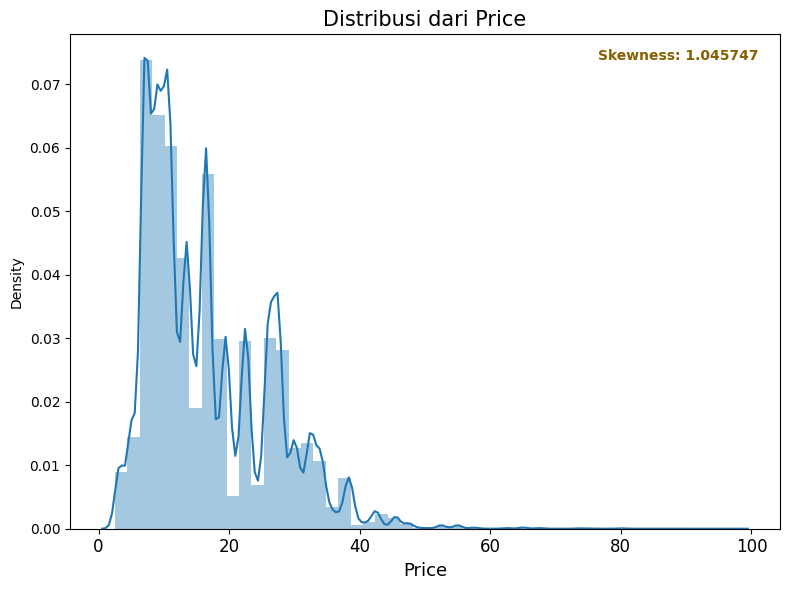

In [29]:
fig, axes = plt.subplots(figsize=(8, 6)) #Membuat plot awal

# Plot distribusi dari kolom "price"
sns.distplot(df['price'], ax=axes)

axes.set_title('Distribusi dari Price', fontsize=15, loc='center')
axes.set_xlabel('Price', fontsize=13)
plt.tick_params(axis='x', which='major', labelsize=12)
axes.yaxis.tick_left()  # where the y axis marks will be

# Tambahkan teks untuk skewness dan kurtosis
axes.text(x=0.97, y=0.97, transform=axes.transAxes,
            s="Skewness: %f" % df['price'].skew(), fontweight='demibold', fontsize=10,
            verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')

plt.tight_layout()
plt.show()

Dari plot diatas, diketahui bahwa:
- Distribusi harga miring ke kanan (positif). Hal ini menunjukkan bahwa terdapat lebih banyak data harga di bawah rata-rata dibandingkan di atas rata-rata.
- 1.045747. Ini menunjukkan bahwa distribusi harga cukup miring ke kanan.
- Sebaran data cukup lebar, dengan beberapa outlier di bagian atas.

Hal ini bisa menunjukan bahwa rata-rata biaya berada pada rentang 0-20$ dan terdapat beberapa outlier yang diasumsikan berasal dari beberapa pengguna yang melakukan perjalan cukup jauh.

### Untuk membuktikan asumsi biaya yang tinggi hasul dari beberapa pengguna yang melakukan perjalan yang jauh, maka akan dilihat melalu scatter plot

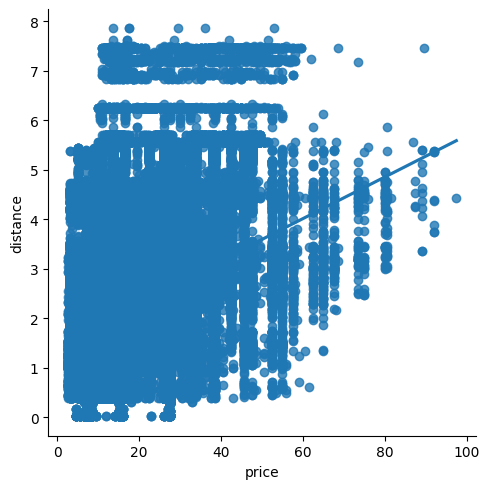

In [150]:
sns.lmplot(df, x='price', y='distance')#membuat scatter plot dengan garis korelasi

Dari plot diatas dapat diketahui bahwa ada korelasi positif antara harga dan jarak. Ini berarti bahwa seiring dengan bertambahnya jarak, harga juga cenderung meningkat. Ini sesuai dengan dugaan bahwa perjalanan taksi yang lebih jauh akan lebih mahal daripada perjalanan yang lebih pendek. Dari plot juga bisa dikatakan bahwa korelasi antara jarak dan harga juga tidak terlalu tinggi, hal ini dilihat dari titik plot yang berada jauh dari gari korelasinya.

### Selanjutnya kita akan melihat ringkasan dari kolom fitur kategori

In [31]:
df.describe(include="object")#melihat ringkasan data kategori

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,637976,637976,637976,637976,637976,637976,637976,637976,637976,637976,637976
unique,637976,31350,1,12,12,2,12,12,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:33:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,151,637976,54197,54192,330568,55096,55096,201429,186262,201429


Dari hasil ringkasan diatas, diketahui bahwa:
- kolom id merupakan primary key dari dataset ini
- dataset ini diambil dari daerah dengan timezone America/New_York
- setiap kolom memiliki skala pengukuran nominal
- hanya ada 2 jenis taxi yang ada pada dataset ini yaitu uber dan lyft dengan uber merupakan taksi yang lebih banyak dipesan
- Banyak taxi yang dipesan pada waktu cuaca berawan
- Ada hal menarik yaitu pada datetime, ada 151 orang yang memesan taksi secara bersamaan pada waktu tersebut. dan juga hanya ada 31350 data yang berbeda dalam datetime.

Dari hasil ringkasan, terdapat hal yang menarik yaitu:
- seberapah jauh perbandingan antara pengguna taksi uber dan lyft?
- Bagaimana perbandingan pengguna taksi online di tiap cuaca yang ada

Untuk mengetahui hal-hal tersebut, kita dapat menggunakan pie chart

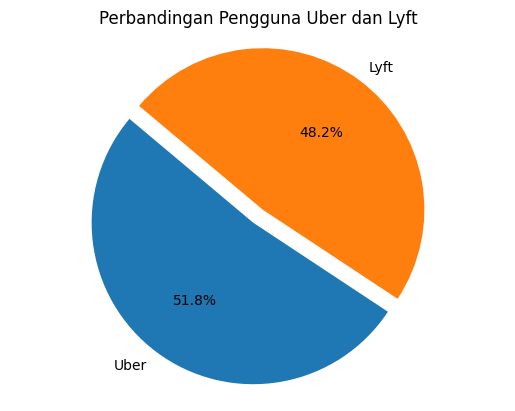

In [32]:
# Create a circle at the center of the plot
my_circle = plt.Circle((0, 0), 0.7, color='white')

# Data
sizes = df['cab_type'].value_counts()
labels = df['cab_type'].unique().tolist()[::-1]

# Menghitung nilai untuk parameter explode
explode = [0.1 if size == sizes.max() else 0 for size in sizes]

# Plot pie chart
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Agar pie chart terlihat seperti lingkaran
plt.title('Perbandingan Pengguna Uber dan Lyft')
plt.show()


Dari plot tersebut, terlihat bahwa pengguna uber sedikit lebih banyak dibandingkan dengan pengguna Lyft. Perbedaannya adalah sekitar 3,6%

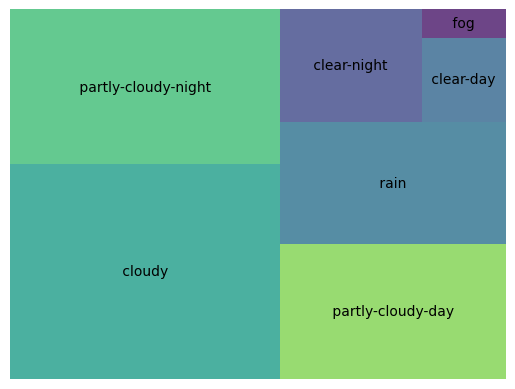

In [33]:
# Data
sizes = df['icon'].value_counts().values
labels = df['icon'].value_counts().index

# Plot
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.axis('off')
plt.show()

dari plot diatas, didapati bahwa:
- Pengguna taksi online paling banyak pada cuaca berawan.
- Pengguna taksi online paling sedikit pada cuaca berkabut.
- Pengguna taksi online berkurang pada cuaca cerah dibandingkan dengan cuaca hujan.
- Pengguna taksi online berkurang pada cuaca cerah berawan siang dibandingkan - dengan cuaca cerah berawan malam.

Berdasarkan artikel https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6191113/ , diketahui bahwa cuaca hujan dan berkabut mempengaruhi jarak pandang yang merupakan salah satu penyebab kecelakan lalu lintas. Hal ini diasumsikan mengapa pengguna taksi online berkurang di cuaca hujan apa lagi berkabut

### Selanjutnya kita akan melihat distribusi dari setiap kolom numerik pada data

In [34]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
df_num = df[list_num]
nilai_skew_tinggi = []
nilai_skew_sedang = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_num.columns:
    skewness = df[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    elif (-1 <= skewness < -0.5) or (0.5 < skewness <= 1):
        nilai_skew_sedang.append(i)
    else:
        nilai_skew_tinggi.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness tinggi:', nilai_skew_tinggi)
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew_sedang)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness tinggi: ['price', 'surge_multiplier', 'latitude', 'precipIntensity', 'precipProbability', 'windGust', 'visibility', 'uvIndex', 'visibility.1', 'apparentTemperatureMin']
kolom yang mempunyai nilai skewness sedang: ['distance', 'temperature', 'apparentTemperatureLow', 'windBearing', 'cloudCover', 'precipIntensityMax', 'temperatureMin', 'apparentTemperatureMax']
kolom yang mempunyai nilai skewness normal: ['timestamp', 'hour', 'day', 'month', 'longitude', 'apparentTemperature', 'humidity', 'windSpeed', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime']


Dari hasil analisis nilai skewness, diketahui bahwa:
- kolom target (price) berdistribusi skewness tinggi dengan 8 kolom fitur lainnya
- ada 8 kolom fitur yang berdistribusi skewness sedang
-  dan ada 28 kolom data yang berdistribusi normal

### Setelah dari distribusi di ketahui bahwa terdapat data yang tidak berdistribusi normal, maka diasumsikan pada data ini, banyak menganduk outlier. maka akan dilihat outliers pada kolom yang tidak berdistribusi normal.

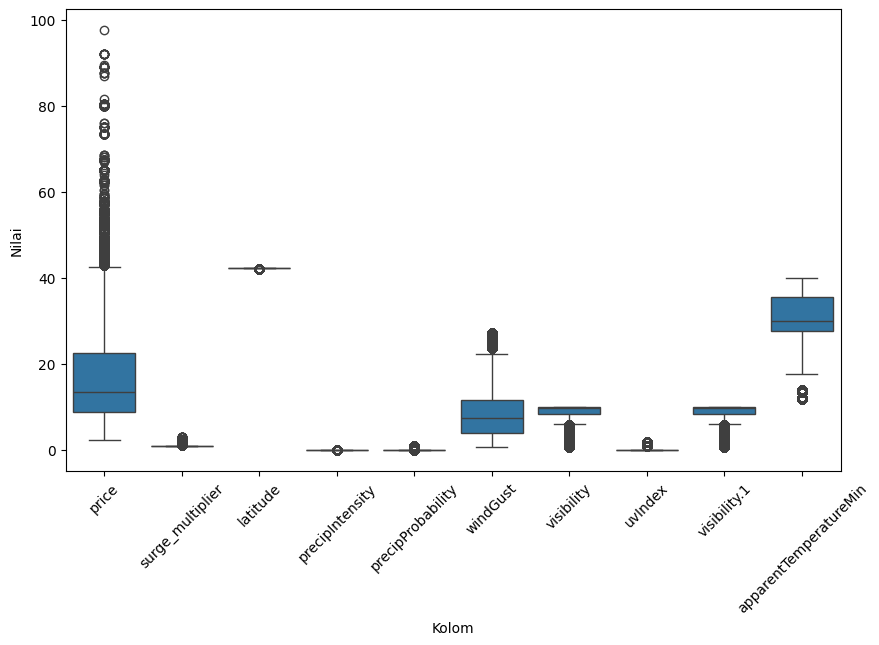

In [35]:
# Menampilkan boxplot untuk kolom-kolom dengan skewness tinggi
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[nilai_skew_tinggi].melt(var_name='Kolom', value_name='Nilai'), x='Kolom', y='Nilai')
plt.xticks(rotation=45)
plt.show()

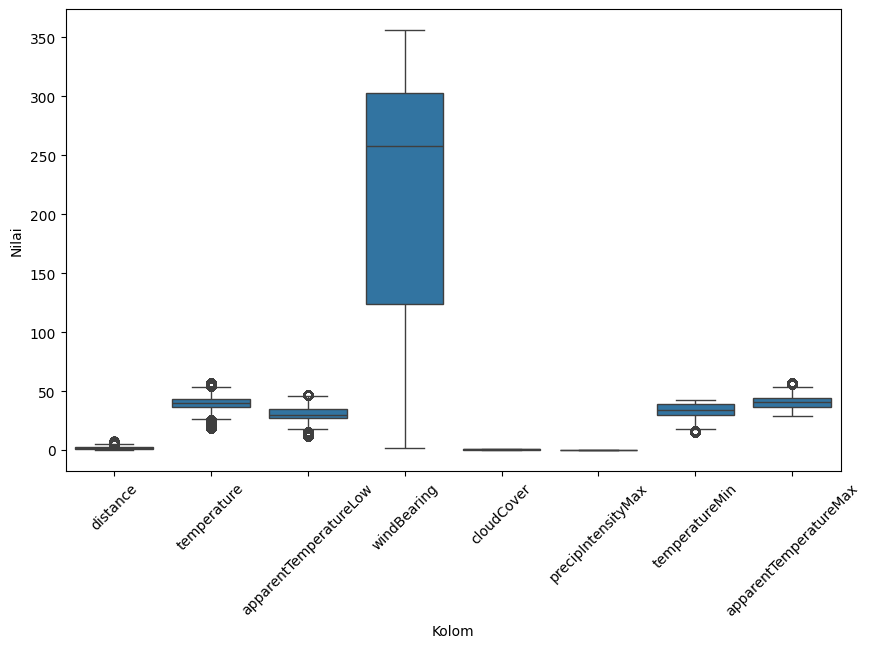

In [36]:
# Menampilkan boxplot untuk kolom-kolom dengan skewness sedang
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[nilai_skew_sedang].melt(var_name='Kolom', value_name='Nilai'), x='Kolom', y='Nilai')
plt.xticks(rotation=45)
plt.show()

Setelah dianalisi menggunakan boxplot, diketahui bahwa:
- setiap kolom dengan nilai skewness tinggi memiliki nilai outlier pada datanya
- pada kolom dengan nilai skewness sedang, hanya kolom cloudcover dan precipIntensityMax yang tidak memiliki outlier pada datanya

#.v Feature Engineering

##.1 Split Data

### Split data dilakukan pertama kali guna menghindari data leaking dan data test tetap aman. digunakan

In [37]:
#mendeskripsikan variabel X dan y
X= df.drop('price', axis = 1)
y=df['price']

In [38]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=200)

spliting data ini digunakan untuk untuk melatih model pada subset train dan menguji kinerjanya pada subset test, sehingga memungkinkan evaluasi yang lebih objektif terhadap kinerja model. pada spliting kali ini, akan dibagi menjadi 20% data test dan 80% data train.



### Kemudian akan dibuat list kolom fitur numerik dan kategori untuk memudahkan feature engineering kedepannya

In [39]:
list_cat = X_train.select_dtypes(include='object').columns.tolist()
list_num = X_train.select_dtypes(exclude='object').columns.tolist()

##2. Handling Outlier

### Dari hasil EDA dikethaui bahwa pada kolom yang tidak berdistribusi normal, ada 14 kolom yang mempunyai outlier pada datanya. tetapi untuk kolom yang berdistribusi normal, tidak dilihat untuk outlier nya pada EDA, sehingga akan dilihat dulu jumlah outlier pada setiap kolom fitur ini

In [40]:
# Hitung IQR
list_outlier=[]
list_lower_bound =[]
list_upper_bound =[]
for i in X_train[list_num]:
    Q1 = np.percentile(X_train[i], 25)
    Q3 = np.percentile(X_train[i], 75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    list_lower_bound.append(lower_bound)
    list_upper_bound.append(upper_bound)

    # Hitung jumlah outlier di bawah batas bawah dan di atas batas atas
    num_outliers_lower = np.sum(X_train[i] < lower_bound)
    num_outliers_upper = np.sum(X_train[i] > upper_bound)

    # Jumlah total outlier
    total_outliers = num_outliers_lower + num_outliers_upper
    list_outlier.append(total_outliers)

outliers = pd.DataFrame()
outliers['Kolom'] = list_num
outliers['Jumlah Outlier'] = list_outlier
outliers['Lower Bound'] = list_lower_bound
outliers['Upper Bound'] = list_upper_bound
outliers

,Kolom,Jumlah Outlier,Lower Bound,Upper Bound
0,timestamp,0,1.541369e+09,1.546903e+09
1,hour,0,-1.200000e+01,3.600000e+01
2,day,0,-9.500000e+00,5.050000e+01
3,month,0,9.500000e+00,1.350000e+01
4,distance,5298,-1.220000e+00,5.420000e+00
5,surge_multiplier,16793,1.000000e+00,1.000000e+00
6,latitude,65154,4.232870e+01,4.238630e+01
7,longitude,0,-7.112120e+01,-7.101400e+01
8,temperature,26874,2.575500e+01,5.427500e+01
9,apparentTemperature,39210,1.976000e+01,5.216000e+01


Pada analisis untuk mengetahui jumlah outliers diatas, diketahui bahwa ada 19 kolom yang memiliki outlier:
- Distance : Berdasarkan EDA, variabel distance memiliki korelasi positif terhadap harga. semakin tinggi nilai distance maka semakin tinggi juga nilai harga nya. sehingga untuk outlier pada distance akan di simpan
- surge_multiplier : surge_multiplier merupakan lonjakan harga atau perkalian harga taksi online dimana pada suatu tempat memiliki demand pengguna taksi yang tinggi sementara supply taksi sedikit (https://economicsforlife.ca/wp-content/uploads/2015/10/effects_of_ubers_surge_pricing.pdf). untuk outlier surge_multiplier akan disimpan juga karena diasumsikan berpengaruh pada harga (price)
- latitude : latitude merupakan penanda lokasi pengguna (Latitude atau garis lintang adalah garis yang menentukan lokasi berada di sebelah utara atau selatan ekuator). secara definisi, nilai outlier pada Latitude tidak berpengaruh terhadap harga sehingga outlier nya akan di handling
- temperature, apparentTemperature, temperatureHigh, apparentTemperatureHigh, apparentTemperatureLow, temperatureMin, temperatureMax, apparentTemperatureMin, apparentTemperatureMax : temperature merupakan nilai temperature pada saat pengguna memesan taksi online. secara intuisi, dipercaya seseorang memesan taksi online bisa dipengaruhi temperature karena untuk mencari tempat yang memiliki temperatur yang lebih normal. namum, hal tersebut berpengaruh pada surge_multiplier sehingga di asumsikan hanya berpengaruh sedikit terhadap harga, maka nilai outliers pada temperature akan di handling
-  precipIntensity : precipIntensity merupakan intensitas curah hujan di lokasi awal perjalanan.  pada EDA, precipIntensity bisa berpengaruh karena, cuaca hujan merupakan tingkat ke 4 cuaca yang yang paling banyak pengguna taksi online. namun sama seperti pada temperature, hal tersebut berpengaruh pada surge_multiplier nya sehingga di asumsikan hanya berpengaruh sedikit terhadap harga, maka nilai outliers pada temperature akan di handling
- precipProbability : precipProbability merupakan probabilitas curah hujan di lokasi awal. Diketahui juga nilai outliers nya sama dengan precipIntensity, maka diasumsikan bahwa  precipProbability memiliki nilai yang sama dengannya, sehingga nilai outliernya juga akan di handling
- windGust : windGust merupakan kecepatan rata-rata dari lonjakan angin di lokasi awal perjalanan. secara garis besar, windgust hanya berlangsung kurang lebih 20 s (https://taharicadatamonitoring.com perbedaan-antara-wind-speed-dan-wind-gust/) maka diasumsikan nilai windgust tidak berpengaruh signifikan sehingga nilai outliers nya akan di handling.
-  visibility, visibility.1 : visibility merupakan jarak pandang di lokasi awal perjalanan dan visibility.1 merupakan jarak pandang pada satuan mil. seperti pada EDA, jarak pendang biasanya terjadi pada cuaca berkabut atau hujan. dan juga seperti pada precipIntensity, maka nilai outliernya akan di handling
- dewPoint : dewPoint merupakan titik embun di lokasi awal perjalanan. Peristiwa mengembun terjadi karena adanya penurunan suhu atau pelepasan panas yang dialami benda tersebu (https://www.detik.com/bali/berita/d-6445925/apa-saja-yang-menyebabkan-terjadinya-peristiwa-membeku-mencair-dan-menguap#:~:text=Mengembun%20adalah%20peristiwa%20perubahan%20wujud,panas%20yang%20dialami%20benda%20tersebut.) sehingga secara garis besar, dapat diasumsikan bahwa semakin tinggi atau renda nilai embunnya, tidak berpengaruh terhadap nilai harga sehingga outliernya akan di handling
- uvIndex : uvIndex merupakan indeks radiasi ultraviolet yang diproyeksikan pada tengah hari matahari. Kita bisa asumsikan bahwa pengguna taksi online akan melonjak jika cuaca tersebut sedang terik-teriknya atau dalam artian mempunyai nilai UvIndex yang tinggi. namun sama seperti pada temperatur, hal tersebut berpengaruh pada surge_implier, sehingga akan di handling untuk outlier pada kolom ini

Dari hasil analisa varibael yang mengandung ouliers menggunakan hal yang sudah didapat melalui eda dan study literatur melalui jurnal dan website yang ada di internet, didapati bahwa semua kolom yang mengandung outlier kecuali distance dan surge_multiplier yang dianggap memiliki hubungan dengan kolom target akan di handling dengan winzosir (capping) guna menjaga jumlah data yang ada. Untuk kolom dengan skewness akan menggunakan metode iqr dan untuk kolom dengan distribusi normal akan menggunakan metode gaussian. tetapi untuk kolom ['precipIntensity', 'precipProbability', 'uvIndex'] akan digunakan tripping dikerenakan variansi data yang terlalu kecil

###Capping outliers

In [41]:
## Membuat list outliers dengan skewness
outliers_skew_list = nilai_skew_sedang + nilai_skew_tinggi
# Daftar nilai yang ingin dihapus
excluded_values = ['cloudCover', 'precipIntensityMax', 'distance', 'surge_multiplier', 'price', 'precipIntensity', 'precipProbability', 'uvIndex']
# Membuat list yang berisi nilai yang tidak termasuk dalam excluded_values
outliers_skew = [value for value in outliers_skew_list if value not in excluded_values]

#membuat list outliers dengan distribusi normal 
outliers_norm=(['apparentTemperature','temperatureHigh','apparentTemperatureHigh','dewPoint','temperatureMax'])


In [42]:
# Menginisialisasi OutlierTrimmer
ot_normal = OutlierTrimmer(capping_method='gaussian', tail='both', fold=3, variables=outliers_norm)
ot_skew = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5,variables=outliers_skew)

In [43]:
#melakukan capping pada data train
X_train_new= ot_skew.fit_transform(X_train)
X_train_new = ot_normal.fit_transform(X_train_new)

In [44]:
X_train_new.shape

(266960, 56)

###Triming outliers

In [45]:
# Dapatkan batas atas dan batas bawah untuk 'precipIntensity'
upper_bound = outliers.loc[outliers['Kolom'] == 'precipIntensity', 'Upper Bound'].values[0]
lower_bound = outliers.loc[outliers['Kolom'] == 'precipIntensity', 'Lower Bound'].values[0]

# Flag the outliers in category `precipIntensity`
outliers_precipIntensity = np.where((X_train_new['precipIntensity'] > upper_bound) |
                                    (X_train_new['precipIntensity'] < lower_bound), True, False)

# Dapatkan batas atas dan batas bawah untuk 'precipProbability'
upper_bound = outliers.loc[outliers['Kolom'] == 'precipProbability', 'Upper Bound'].values[0]
lower_bound = outliers.loc[outliers['Kolom'] == 'precipProbability', 'Lower Bound'].values[0]

# Flag the outliers in category `uvIndex`
outliers_precipProbability = np.where((X_train_new['precipProbability'] > upper_bound) |
                               (X_train_new['precipProbability'] < lower_bound), True, False)

# Dapatkan batas atas dan batas bawah untuk 'uvIndex'
upper_bound = outliers.loc[outliers['Kolom'] == 'uvIndex', 'Upper Bound'].values[0]
lower_bound = outliers.loc[outliers['Kolom'] == 'uvIndex', 'Lower Bound'].values[0]

# Flag the outliers in category `uvIndex`
outliers_uvIndex = np.where((X_train_new['uvIndex'] > upper_bound) |
                               (X_train_new['uvIndex'] < lower_bound), True, False)

# Trimming the dataset
X_train_trimmed = X_train_new.loc[~(outliers_precipIntensity + outliers_precipProbability + outliers_uvIndex)]


Karena ada perbedaan antara jumlah nilai pada variabel X dan y, makan akan disesuaikan

In [46]:
y_train = y_train.loc[X_train_trimmed.index]

##3. Feature Selection

### Kemudian akan dilihat hubungan antara vaiabel bebas dan variabel terikatnya masing-masing, mana data yang memiliki hubungan lemah dengan variabel terikat maka akan didiskualifikasi pada bagian feature selection

#### Melihat korelasi variabel terikat dengan variabel bebas yang numerik menggunakan heatmap dan korelasi spearman (karena data mengandung outlier). diberikan trashold 0.05 untuk nilai korelasi minimal

In [47]:
# Hitung korelasi antara semua fitur terhadap fitur "price" menggunakan metode Spearman
correlation = X_train_trimmed[list_num].corrwith(y_train, method='spearman')

# Filter korelasi yang memenuhi syarat
filtered_correlation_num = correlation[(correlation >= 0.05) | (correlation <= -0.05)]
filtered_correlation_num

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


distance            0.336401
surge_multiplier    0.166999
dtype: float64

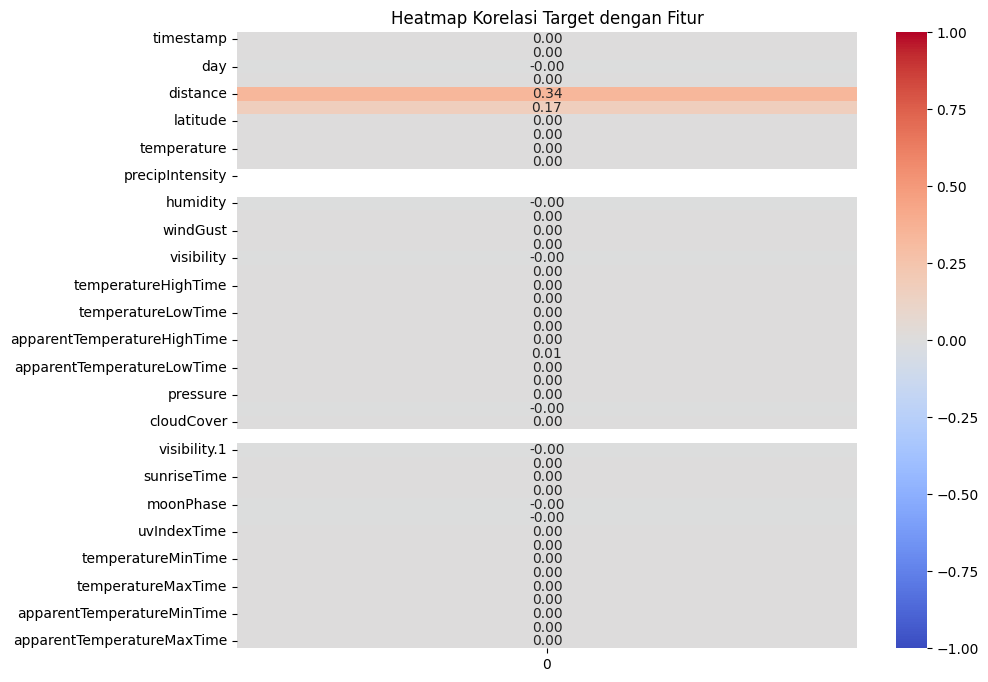

In [48]:
#Mendeskripsikan dataframe correlation guna dibuat heatmap nya
correlation = pd.DataFrame(correlation)
#Membuat heatmap plot nya
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Target dengan Fitur')
plt.show()


Dari hasil analisis nilai korelasi antara kolom fitur dengan kolom target, ditemukan bahwa hanya ada 2 kolom fitur yang memiliki nilai korelasi pada kolom target yaitu:
- Distance
- Surge_multiplier

Namun korelasi yang ada pun tidak terlalu tinggi dimana nilainya dibawah 0.5.

### Untuk melihat korelasi antar kolom fitur dengan jenis data kategori dengan variabel target yang numerik, bisa digunakan korelasi kendall tau dan akan diploting nilai nya menggunakan heatmap.

In [49]:
#Membuat fungsi untuk menganalisa nilai korelasi antar variabel fitur yang kategori dan variabel target
list_nilai_korelasi = []
for kategori in list_kategori:
    tau, p_value = kendalltau(X_train_trimmed[kategori], y_train)
    list_nilai_korelasi.append(tau)

#Membuat dataframe nilai korelasi tersebut
nilai_korelasi_kategori = pd.DataFrame({
        'Nama': list_kategori,
        'Nilai Korelasi': list_nilai_korelasi
    })
# Filter korelasi yang memenuhi syarat
filtered_correlation_cat = nilai_korelasi_kategori[(nilai_korelasi_kategori['Nilai Korelasi'] >= 0.05) | (nilai_korelasi_kategori['Nilai Korelasi'] <= -0.05)]
filtered_correlation_cat

,Nama,Nilai Korelasi
5,cab_type,-0.056496
6,product_id,0.052448
7,name,-0.396220


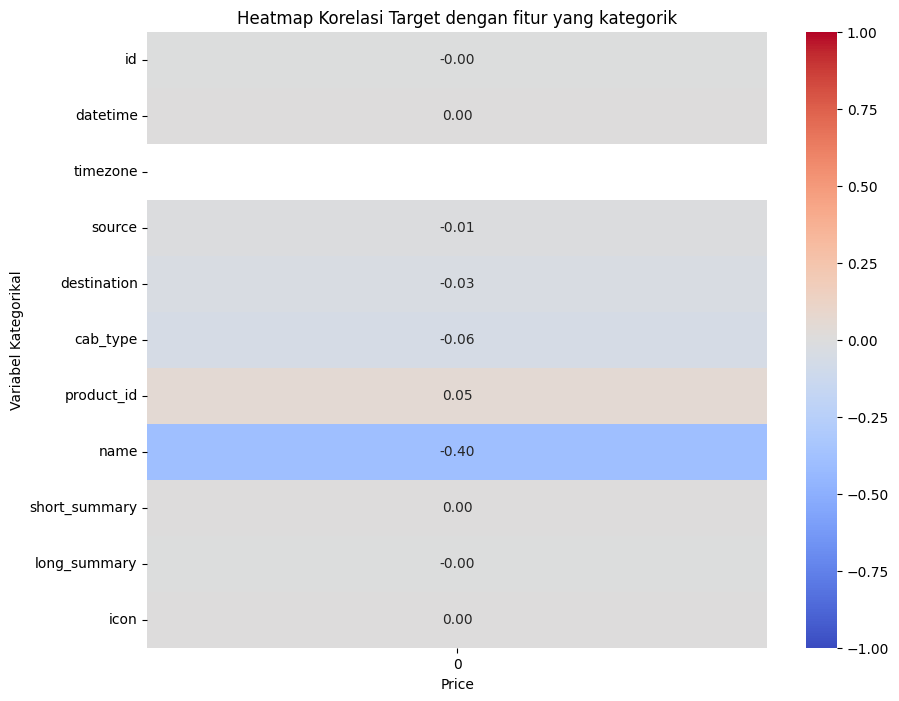

In [50]:
#Mendeskripsikan dataframe untuk list nilai korelasi agar bisa dibentuk heatmapnya
list_korelasi_kategori = pd.DataFrame(list_nilai_korelasi, index=list_kategori)

#Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(list_korelasi_kategori, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Target dengan fitur yang kategorik')
plt.xlabel('Price')
plt.ylabel('Variabel Kategorikal')
plt.show()


dari hasil analisis korelasi kendall tau diatas, didapati bahwa ada 3 kolom fitur kategori yang memiliki korelasi dengan kolom target, namum sama seperti korelasi pada kolom fitur numerik, nilai korelasinya tidak terlalu tinggi. kemudian didapati juga kolom yang tidak mempunyai nilai korelasi pada kolom timezone, dikarenakan kolom tersebut hanya mempunyai 1 nilai yaitu America/NewYork sehingga nilainya adalah Nan. namun, diketahui bahwa kolom product id merupakan kolom tanda untuk nama-nama taksi sehingga bisa kita drop saja langsung

### Berdasarkan hasil analisis korelasi pada EDA, maka dipilih 5 fitur yang akan digunakan yaitu:
- Distance
- Surge Multiplier
- Cab_type
- Name

In [51]:
#drop kolom fitur yang tidak memiliki korelasi tinggi pada data train
X_train_select = X_train_trimmed.drop(columns=X_train_trimmed.columns.difference(['distance', 'surge_multiplier', 'cab_type','name']))

In [52]:
#drop kolom fitur yang tidak memiliki korelasi tinggi pada data test
X_test = X_test.drop(columns=X_test.columns.difference(['distance', 'surge_multiplier', 'cab_type','name']))

##4. Encoding

Pada proses ini, kita akan mengubah nilai kategori pada kolom menjadi nilai numerik. pada tahapan ini, akan digunakan:
- Ordinal encode pada bagian cab type karena hanya memiliki 2 nilai, agar tidak memperbanyak jumlah kolom, maka digunakan ordinal encode dengan uber = 0 dan lyft = 1
- OneHot encode untuk name dikarenakan kolom tersebut bukan nilai ordinal

Ordinal Encode

In [53]:
cab_type_cat = ['Uber', 'Lyft'] #mengatur urutan
ord_enc = OrdinalEncoder(categories= [cab_type_cat])
#Encoding
X_train_select['cab_type'] = ord_enc.fit_transform(X_train_select[['cab_type']])
X_test['cab_type'] = ord_enc.transform(X_test[['cab_type']])

OneHot Encode

In [54]:
#Mendeskripsikan list kolom yang akan di encode
list_nom=['name']

#melakukan encode
enc_ohe =  OneHotEncoder(sparse_output=False)
enc_ohe.fit(X_train_select[list_nom])
x_train_ohe = enc_ohe.transform(X_train_select[list_nom])
x_test_ohe = enc_ohe.transform(X_test[list_nom])

In [55]:
#Menyatukan data train dengan data hasil onehotencode dan membuat kolom yang lama
#mendapatkan nilai dari hasil encode
feature_names = enc_ohe.get_feature_names_out(input_features=list_nom)
#Membuat dataframe hasil encode
X_train_ohe_df = pd.DataFrame(x_train_ohe, columns = feature_names)
X_test_ohe_df = pd.DataFrame(x_test_ohe, columns = feature_names)
#mereset index dataframe agar bisa disatukan
X_train_select.reset_index(drop=True, inplace= True)
X_test.reset_index(drop=True, inplace= True)
#menyatukan dataset encode dengan x_train dan x_test
X_train_encode = pd.concat ([X_train_select, X_train_ohe_df], axis = 1)
X_test_encode = pd.concat ([X_test, X_test_ohe_df], axis = 1)
#membuang kolom yang lama
X_train_encode.drop('name', axis=1, inplace=True)
X_test_encode.drop('name', axis=1, inplace=True)

#5. Scalling

Scalling dilakukan untuk menyamakan rentang data pada setiap data numerik yang ada. Pada scalling kali ini akan digunakan robust scalling dikarenkan fitur yang ada berdistribusi dengan skewness yang tinggi

In [56]:
#mendeskripsikan list nilai numerik
list_num = ['distance','surge_multiplier']
#melakukan scalling menggunakan robust scaller
robust_scaler = RobustScaler()
robust_scaler.fit(X_train[list_num])
X_train_encode[list_num] = robust_scaler.transform(X_train_encode[list_num])
X_test_encode[list_num] = robust_scaler.transform(X_test_encode[list_num])

Membuat dataframe baru hasil dari scalling sebagai X_train_final dan X_test_final

In [57]:
X_train_final = X_train_encode
X_test_final = X_test_encode

#vi. Model Definition

### Pada model kali ini akan digunakan regresi liner, dikarenakan regresi linear memiliki implementasi yang relatif sederhana dan efisien, terutama dalam kasus regresi linear sederhana. kemudian sifatnya yang mudah dipahami serta karena data yang ada merupakan data kontinu, maka digunakanya regresi linier ini. kemudian pada cost function, karena data yang dimiliki mempunyai outlier, maka digunkan MAE karena MAE merupakan cost function yang tahan terhadap outlier. Serta juga digunakan RSqured untuk mengetahui seberapa baik model yang sudah dibuat. hyperparameter yang digunakan adalah fit intercept untuk menentukan apakah model harus memiliki intercept (bias) atau tidak. Dalam beberapa kasus, intercept tidak diinginkan, terutama jika data telah dinormalisasi sebelumnya

In [142]:
# Daftar kombinasi hyperparameter yang ingin diuji
hyperparameters = [
    {'fit_intercept': True},
    {'fit_intercept': False}
]

#vii. Model Training

Model di train melakukan hyperparameters Fit_intercep maupun tidak

In [143]:
# Simpan nilai-nilai evaluasi untuk setiap kombinasi hyperparameter
evaluation_results = []

# Melakukan training dengan setiap kombinasi hyperparameter
for params in hyperparameters:
    linreg = LinearRegression(**params)
    linreg.fit(X_train_final, y_train)
    y_pred = linreg.predict(X_test_final)
    mae = mean_absolute_error(y_test, y_pred)
    rsquared = r2_score(y_test, y_pred)
    evaluation_results.append({'params': params, 'mae': mae, 'squared':rsquared})


# Menampilkan hasil evaluasi
for result in evaluation_results:
    print("Hyperparameters:", result['params'])
    print("Mean Absolute Error:", result['mae'])
    print("RSquared:", result['squared'])
    print()


Hyperparameters: {'fit_intercept': True}
Mean Absolute Error: 1.777679615526006
RSquared: 0.926314227329849

Hyperparameters: {'fit_intercept': False}
Mean Absolute Error: 1.7776808358728204
RSquared: 0.926314227329849



#viii. Model Evaluation

Nilai MAE yang relatif kecil menunjukkan bahwa model memiliki kesalahan rata-rata yang rendah dalam memprediksi harga taksi online. Selain itu, nilai R-squared yang tinggi menunjukkan bahwa model dapat menjelaskan keragaman sebagian besar dari data latih dan uji. Model regresi linier yang telah dilatih cukup baik dalam memprediksi harga taksi online berdasarkan fitur-fitur yang dimasukkan. Meskipun terdapat sedikit perbedaan antara performa pada data latih dan data uji, namun perbedaan tersebut cukup kecil sehingga kita dapat menganggap model ini memiliki kemampuan generalisasi yang baik. dari hasil menggunakan fit_intercept maupun tidak, nilai yang dihasilkan sangat tidak banyak berbeda sehingga dapat disimpulkan bahwa model ini tidak diperngarhui banyak oleh intercept nya

Untuk melihat bagaimana model mampu memprediksi nilai sesuai dengan nilai aslinya, kita dapat menggunakan skatter plot

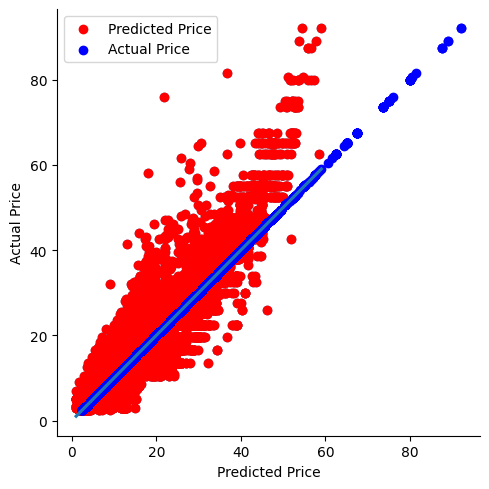

In [136]:
# Membuat scatter plot dengan garis korelasi# Membuat scatter plot dengan garis korelasi
sns.lmplot(x='Predicted Price', y='Actual Price', data=pd.DataFrame({'Predicted Price': y_pred, 'Actual Price': y_test}))

# Menambahkan scatter plot untuk Predicted Price
plt.scatter(y_pred, y_test, color='red', label='Predicted Price')

# Menambahkan scatter plot untuk Actual Price
plt.scatter(y_test, y_test, color='blue', label='Actual Price')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

Dalam scatter plot ini, sebagian besar titik data terkelompok di sekitar garis diagonal, menunjukkan bahwa model cenderung memiliki kinerja baik dalam memprediksi harga aktual. Namun, terdapat beberapa titik data yang tersebar lebih jauh dari garis diagonal, yang menunjukkan bahwa prediksi model kurang akurat untuk titik-titik tersebut.

#ix. Mode Saving

Untuk memudahkan kita dalam menggunakan model machine learning dan feature engineering yang sudah dibuat, berikutnya kita akan simpan menggunakan joblib agar nanti pada suatu saat kita membutuhnya, kita bisa langsung menggunakannya

In [78]:
#save mode
with open('model_linreg.pkl', 'wb') as file1:
  joblib.dump(linreg,file1)

#save ordinal encoding
with open('enc_ord.pkl', 'wb') as file2:
  joblib.dump(ord_enc,file2)

#save onehot encoding
with open('enc_ohe.pkl', 'wb') as file3:
  joblib.dump(enc_ohe,file3)

#save robust scaller
with open('mm_scaler.pkl', 'wb') as file4:
  joblib.dump(robust_scaler,file4)

#save normal capping
with open('ot_normal.pkl', 'wb') as file5:
  joblib.dump(ot_normal,file5)

#save Skew capping
with open('ot_skew.pkl', 'wb') as file6:
  joblib.dump(ot_skew,file6)

#x. Model Inference

Model akan dicoba untuk melakukan prediksi dengan data baru yang belum perna di training sebelumnya

In [146]:
data_inf = {
    'cab_type': ['Uber','Uber'],
    'distance':  [3.14,2.90],
    'surge_multiplier' : [1.07, 1.38],
    'name':['UberXL','WAV'],
}
df_inf =pd.DataFrame(data_inf)
df_inf

,cab_type,distance,surge_multiplier,name
0,Uber,3.14,1.07,UberXL
1,Uber,2.90,1.38,WAV


Melakukan load dari model yang sudah disaving, namum akan digunkaan encoding saja untuk mengetest sejauh mana model bisa melakukan prediksi dengan akurat

In [147]:
#load mode
with open('model_linreg.pkl', 'rb') as file1:
  linreg=joblib.load(file1)

#load ordinal encoding
with open('enc_ord.pkl', 'rb') as file2:
  enc_ord=joblib.load(file2)

#load onehot encoding
with open('enc_ohe.pkl', 'rb') as file3:
  enc_ohe=joblib.load(file3)

### encoding data inferensia menggunakan ordinal untuk data cap_type dan one hot encode untuk data name, supaya sama dengan model yang sudah di train sebelumnya

In [148]:
#melakukan ordinal encode
df_inf['cab_type'] = ord_enc.transform(df_inf[['cab_type']])

In [149]:
#Melakukan onehotencode
df_inf_ohe = enc_ohe.transform(df_inf[list_nom])

In [150]:
#Menyatukan data train dengan data hasil onehotencode dan membuat kolom yang lama
#mendapatkan nilai dari hasil encode
feature_names = enc_ohe.get_feature_names_out(input_features=list_nom)
#Membuat dataframe hasil encode
df_inf_ohe = pd.DataFrame(df_inf_ohe, columns = feature_names)
#mereset index dataframe agar bisa disatukan
df_inf.reset_index(drop=True, inplace= True)
#menyatukan dataset encode dengan x_train dan x_test
df_inf_encode = pd.concat ([df_inf, df_inf_ohe], axis = 1)
#membuang kolom yang lama
df_inf_encode.drop('name', axis=1, inplace=True)


In [151]:
## prediksi dari data inferensia
pred_inf = linreg.predict(df_inf_encode)
pred_inf

array([49.88048627, 48.55414605])

Maka dengan data 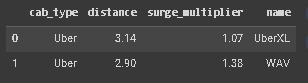
model mampu membuat prediksi untuk harga pertama yaitu:
- $ 49.88048627 dan

- $ 48.55414605

#xi. Kesimpulan

Dari seluruh proses pembuatan machine learning untuk memperkirakan harga suatu taksi online dengan kolom fitur yang ada pada dataset uber lyft. didapatkan model dengan nilai Rsquared sebesar 0.9263125419238789, hal ini berarti kolom fitur mampu menjelaskan keragaman dari kolom target sebesar 92% sedangkan sisahnya dijelaskan oleh kolom lainnya. kemudian didapati pula bahwa nilai MAE sebesar 1.7776808358728204, hal ini berarti model memiliki rata-rata kesalahan yang rendah dalam memprediksi nilai sebenarnya. sehingga dapat disimpulkan bahwa model machine learning ini sudah mampu dalam memprediksi harga taksi online berdasarkan variabel fitur yang dimilikinya.

-------------

# Conseptual Problems
1. Sebut dan jelaskan asumsi yang dipakai dalam linear regression
2. Tunjukan dan tafsirkan arti dari slope dan intercept yang didapat dari model

# Answer:
1. 
Linearitas: Model Linear Regression mengasumsikan bahwa hubungan antara variabel independen (fitur) dan variabel dependen (target) adalah linear. Ini berarti bahwa perubahan dalam variabel independen memiliki efek yang konstan terhadap variabel dependen.

Multikolinieritas: Asumsi ini mengasumsikan bahwa setiap kolom fitur dalam dataset adalah independen satu sama lain. Artinya, nilai-nilai dari satu kolom fitur tidak dipengaruhi oleh nilai-nilai observasi lainnya.

Homoskedastisitas: Asumsi ini mengimplikasikan bahwa variabilitas dari error (galat) model adalah konstan sepanjang rentang nilainya. Dalam konteks regresi, ini berarti bahwa error yang dihasilkan oleh model tidak cenderung lebih besar atau lebih kecil pada nilai-nilai tertentu dari kolom fitur.

Error berdistribusi normal: Asumsi ini mengasumsikan bahwa error daru model berasal distribusi normal. Dengan kata lain, jika kita menggambarkan distribusi error, akan tampak seperti lonceng (bell-shaped curve) dengan mean,median, dan modusnya berada di tengah.

Tidak adanya autokorelasi di error: Asumsi ini mengimplikasikan bahwa tidak boleh ada korelasi antara variansi pada variabel error.


Untuk menjawab soal nomor 2. kita terlebih dahulu akan memunculkan nilai intercept dan slope dari model yang telah dibagun:

In [152]:
#Melihat nilai coef dan intercept

coefficients = linreg.coef_
intercept = linreg.intercept_

print('nilai intercept:',intercept)
print('nilai coefficient:',coefficients)


nilai intercept: 0.0
nilai coefficient: [14.32093531  4.63951399 18.44112793 20.42943675 30.22128502  2.68978376
  8.00820751 17.24285238 -5.49538948  0.22094497 -8.34546382  8.65685435
  9.6896637  15.58040544  9.65079893]


- Nilai intercept dalam model Linear Regression adalah nilai dari variabel dependen (target) ketika semua variabel independen (fitur) memiliki nilai 0. Dalam kasus ini, nilai intercept yang ada adalah (0) dikarenakan menggunakan fungsi tidak fit_intercept yang digunakan pada model. jika menggunakan fungsi ini, maka akan dihasilkan nilai coef dan intercept yang besar seperti code dibawah. dan untuk intepretasinya sendiri, nilai intercept yang 0 berarti jika semua variabel fitur bernilai konstan 0, maka nilai variabel target(price) akan bernilai 0

- Nilai koefisien menunjukkan seberapa besar pengaruh setiap variabel independen terhadap variabel dependen. Dalam kasus ini, koefisien memiliki nilai yang beragam, mulai dari 14.32 hingga 30.22. Ini menunjukkan bahwa setiap fitur memiliki pengaruh yang berbeda terhadap variabel dependen. Sebagai contoh, koefisien yang positif menunjukkan hubungan positif antara fitur tersebut dengan variabel dependen, sedangkan koefisien yang negatif menunjukkan hubungan negatif. dalam artinya, jika nilai kolom fitur 1 bertambah 1 satuan, maka nilai y atau 'price'akan bertambha sebesar 14.3209... jika kolom fitur lain bernilai konstan. begitupun intepretasi untuk nilai lainnya

selanjutnya akan ditunjukan nilai coef dan intercept untuk model yang menggunakan fit_intercept

In [153]:
linreg = LinearRegression(fit_intercept = True)
linreg.fit(X_train_final, y_train)

# Check coefficients and intercept

coefficients = linreg.coef_
intercept = linreg.intercept_

print('nilai intercept:',intercept)
print('nilai coefficient:',coefficients)


nilai intercept: 3060739874168.3203
nilai coefficient: [-2.27492405e+12  4.64013672e+00  1.84392700e+01 -3.06073987e+12
 -3.06073987e+12 -7.85815828e+11 -7.85815828e+11 -7.85815828e+11
 -7.85815828e+11 -7.85815828e+11 -7.85815828e+11 -3.06073987e+12
 -3.06073987e+12 -3.06073987e+12 -3.06073987e+12]
